In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [3]:
from rec_to_binaries.read_binaries import readTrodesExtractedDataFile, write_trodes_extracted_datafile

import numpy as np

In [15]:
def add_system_time_to_file(continuous_time_file, new_file_name):
    cont_time = readTrodesExtractedDataFile(continuous_time_file)
    print(cont_time)
    cont_time['data'] = create_and_add_system_timepoints(cont_time)
    cont_time['Fields'] = '<trodestime uint32><systime int64>' #here
    write_trodes_extracted_datafile(new_file_name, cont_time)

In [16]:
def create_and_add_system_timepoints(cont_time):
    # Assumptions: 'clockrate' is in Hz; 'system_time_at_creation' is taken to the millisecond

    nanosec_per_sample = int((1/int(cont_time['Clockrate']))* (1e9)) #here
    sys_time = np.zeros(np.shape(cont_time['data'])).astype('int64')
    interval = (cont_time['data'][0][0] - int(cont_time['Timestamp_at_creation'])) * nanosec_per_sample #here
    sys_time[0] = (interval + (int(cont_time['System_time_at_creation']) * (1e6))).astype(int) #here

    for i in range(1,np.size(sys_time)):
        trodes_interval = cont_time['data'][i][0] - cont_time['data'][i-1][0]

        #conditionals account for rounding and skipped trodes samples in nanoseconds
        if (trodes_interval%3==0):
            sys_interval = int(trodes_interval * nanosec_per_sample) + int(trodes_interval/3)
        elif (i%3==0):
            sys_interval = int(trodes_interval * nanosec_per_sample) + 1
        else:
            sys_interval = int(trodes_interval * nanosec_per_sample)

        sys_time[i] = sys_interval + sys_time[i-1]
        
    return package_sys_time_with_trodes_time(sys_time, cont_time)

In [17]:
def package_sys_time_with_trodes_time(sys_time, cont_time):
    # data type copied from current continuoustime.dat files
    dt = np.dtype([('trodestime', np.uint32), ('systime', np.int64)])

    data = [0] * np.size(sys_time)

    for i in range(0,np.size(data)):
        data[i] = (cont_time['data'][i][0], sys_time[i])

    packaged_data = np.array(data, dtype=dt)

    return packaged_data

In [18]:
add_system_time_to_file('/Users/Clay/Dropbox/Extraction_tests/Remy/preprocessing/20170823/20170823_remy_01_s1.time/20170823_remy_01_s1.continuoustime.dat', '/Users/Clay/Desktop/20170823_remy_01_s1.continuoustime.dat')



{'Description': 'Continuous time periods (start and end times)', 'Byte_order': 'little endian', 'Original_file': '20170823_remy_01_s1.rec', 'Clockrate': '30000', 'System_time_at_creation': '1503512094060', 'Timestamp_at_creation': '936045', 'Trodes_version': '-1', 'Compile_date': '-1', 'Compile_time': '-1', 'QT_version': '-1', 'Commit_tag': '-1', 'Controller_firmware': '-1', 'Headstage_firmware': '-1', 'AutoSettle': '-1', 'SmartRef': '-1', 'Gyro': '-1', 'Accelerometer': '-1', 'Magnetometer': '-1', 'Time_offset': '0', 'Fields': '<trodestime uint32>', 'data': array([( 1079446,), ( 1079447,), ( 1079448,), ..., (32910168,),
       (32910169,), (32910170,)], dtype=[('trodestime', '<u4')])}


In [19]:
cont_time_test = readTrodesExtractedDataFile('/Users/Clay/Desktop/20170823_remy_01_s1.continuoustime.dat')


In [24]:
cont_time_test

{'Description': 'Continuous time periods (start and end times)',
 'Byte_order': 'little endian',
 'Original_file': '20170823_remy_01_s1.rec',
 'Clockrate': '30000',
 'System_time_at_creation': '1503512094060',
 'Timestamp_at_creation': '936045',
 'Trodes_version': '-1',
 'Compile_date': '-1',
 'Compile_time': '-1',
 'QT_version': '-1',
 'Commit_tag': '-1',
 'Controller_firmware': '-1',
 'Headstage_firmware': '-1',
 'AutoSettle': '-1',
 'SmartRef': '-1',
 'Gyro': '-1',
 'Accelerometer': '-1',
 'Magnetometer': '-1',
 'Time_offset': '0',
 'Fields': '<trodestime uint32><systime int64>',
 'data': array([( 1079446, 1503512098839985408), ( 1079447, 1503512098840018741),
        ( 1079448, 1503512098840052074), ...,
        (32910168, 1503513159864052074), (32910169, 1503513159864085408),
        (32910170, 1503513159864118741)],
       dtype=[('trodestime', '<u4'), ('systime', '<i8')])}

In [4]:
from rec_to_binaries.read_binaries import readTrodesExtractedDataFile

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'rec_to_binaries'

In [19]:
cont_time = readTrodesExtractedDataFile('/Users/Clay/Dropbox/Extraction_tests/Lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat')




TypeError: readTrodesExtractedDataFile() takes 1 positional argument but 2 were given

In [4]:
cont_time

{'description': 'Continuous time periods (start and end times)',
 'byte_order': 'little endian',
 'original_file': '20190902_lotus_06_r3.rec',
 'clockrate': '30000',
 'system_time_at_creation': '1567459146943',
 'timestamp_at_creation': '390829088',
 'trodes_version': '1.8.2',
 'compile_date': 'May 16 2019',
 'compile_time': '10:32:19',
 'qt_version': '5.9.8',
 'commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'controller_firmware': '0.0',
 'headstage_firmware': '3.9',
 'autosettle': '0',
 'smartref': '0',
 'gyro': '0',
 'accelerometer': '0',
 'magnetometer': '0',
 'time_offset': '0',
 'fields': '<trodestime uint32><systime int64>',
 'data': array([(390923532, 1567459150091663430), (390923533, 1567459150091671120),
        (390923534, 1567459150091674111), ...,
        (443082985, 1567460888733625293), (443082986, 1567460888733629636),
        (443082987, 1567460888733631849)],
       dtype=[('trodestime', '<u4'), ('systime', '<i8')])}

In [26]:
print((int(cont_time_test['data'][-1][0]) - int(cont_time_test['data'][0][0])) / 30000 / 60)
print((int(cont_time_test['data'][-1][1]) - int(cont_time_test['data'][0][1])) / 1e9 / 60)

17.683735555555554
17.68373555555


In [3]:






cont_time_remy = readTrodesExtractedDataFile('/Users/Clay/Dropbox/Extraction_tests/Remy/preprocessing/20170823/20170823_remy_01_s1.time/20170823_remy_01_s1.continuoustime.dat')





/Users/Clay/conda/envs/ex_env/lib/python3.7/site-packages/rec_to_binaries/read_binaries.py:76: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(typearr)


In [4]:
cont_time_remy

{'description': 'Continuous time periods (start and end times)',
 'byte_order': 'little endian',
 'original_file': '20170823_remy_01_s1.rec',
 'clockrate': '30000',
 'system_time_at_creation': '1503512094060',
 'timestamp_at_creation': '936045',
 'trodes_version': '-1',
 'compile_date': '-1',
 'compile_time': '-1',
 'qt_version': '-1',
 'commit_tag': '-1',
 'controller_firmware': '-1',
 'headstage_firmware': '-1',
 'autosettle': '-1',
 'smartref': '-1',
 'gyro': '-1',
 'accelerometer': '-1',
 'magnetometer': '-1',
 'time_offset': '0',
 'fields': '<trodestime uint32>',
 'data': array([( 1079446,), ( 1079447,), ( 1079448,), ..., (32910168,),
        (32910169,), (32910170,)], dtype=[('trodestime', '<u4')])}

In [5]:
# Assumptions: 'clockrate' is in Hz; 'system_time_at_creation' is taken to the millisecond

nanosec_per_sample = int((1/int(cont_time_remy['clockrate']))* (1e9))

sys_time = np.zeros(np.shape(cont_time_remy['data'])).astype('int64')

interval = (cont_time_remy['data'][0][0] - int(cont_time_remy['timestamp_at_creation'])) * nanosec_per_sample

sys_time[0] = (interval + (int(cont_time_remy['system_time_at_creation']) * (1e6))).astype(int)

for i in range(1,np.size(sys_time)):
    trodes_interval = cont_time_remy['data'][i][0] - cont_time_remy['data'][i-1][0]
    
    #conditionals account for rounding and skipped trodes samples in nanoseconds
    if (trodes_interval%3==0):
        sys_interval = int(trodes_interval * nanosec_per_sample) + int(trodes_interval/3)
    elif (i%3==0):
        sys_interval = int(trodes_interval * nanosec_per_sample) + 1
    else:
        sys_interval = int(trodes_interval * nanosec_per_sample)
    
    sys_time[i] = sys_interval + sys_time[i-1]

In [8]:
dt = np.dtype([('trodestime', np.uint32), ('systime', np.int64)])

In [9]:
data = np.array(test, dtype=dt)


SyntaxError: invalid syntax (<ipython-input-30-6deb432c47dd>, line 1)

In [6]:
test = [0] * np.size(sys_time)

for i in range(0,np.size(test)):
    test[i] = (cont_time_remy['data'][i][0], sys_time[i])

In [7]:
print(test[0:10])

[(1079446, 1503512098839985408), (1079447, 1503512098840018741), (1079448, 1503512098840052074), (1079449, 1503512098840085408), (1079450, 1503512098840118741), (1079451, 1503512098840152074), (1079452, 1503512098840185408), (1079453, 1503512098840218741), (1079454, 1503512098840252074), (1079455, 1503512098840285408)]


In [67]:
test1 = [0] * 10

test1[0] = (100, 100)

print(test1)

[(100, 100), 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [42]:
print(((cont_time_remy['data'][0][0], sys_time[0]), (cont_time_remy['data'][1][0], sys_time[1])))

((1079446, 1503512098839985408), (1079447, 1503512098840018741))


In [37]:
data_list = list((cont_time_remy['data'][0][0], sys_time[0]))

for i in range(1,np.size(sys_time)):
    data_list = (data_list, (cont_time_remy['data'][i][0], sys_time[i]))

RecursionError: maximum recursion depth exceeded while calling a Python object

In [16]:
np.array((cont_time_remy['data'][:], sys_time)).T

array([[(1079446,), 1503512098839985408],
       [(1079447,), 1503512098840018741],
       [(1079448,), 1503512098840052074],
       ...,
       [(32910168,), 1503513159864052074],
       [(32910169,), 1503513159864085408],
       [(32910170,), 1503513159864118741]], dtype=object)

In [9]:
print((int(cont_time_remy['data'][-1][0]) - int(cont_time_remy['data'][0][0])) / 30000 / 60)
print((sys_time[-1] - sys_time[0]) / 1e9 / 60)

17.683735555555554
17.68373555555


In [ ]:
need to check difference in time between the two clocks with another data set, see the normal order of magnitude difference

## .pos folder

In [3]:
camera_framecount = readTrodesExtractedDataFile('/Users/Clay/Dropbox/Extraction_tests/Remy/preprocessing/20190902/20190902_lotus_06_r3.1.pos/20190902_lotus_06_r3.1.pos_cameraHWFrameCount.dat')
camera_framecount

/home/edeno/Documents/Github/rec_to_binaries/rec_to_binaries/read_binaries.py:76: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(typearr)


{'clock rate': '30000',
 'fields': '<PosTimestamp uint32><HWframeCount uint32><HWTimestamp uint64>',
 'data': array([(390924404,  8530, 1567459150066619900),
        (390925319,  8531, 1567459150099944700),
        (390926203,  8532, 1567459150133290800), ...,
        (443082102, 52136, 1567460888652051500),
        (443082987, 52137, 1567460888685397600),
        (443083887, 52138, 1567460888718722300)],
       dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')])}

In [4]:
camera_framecount = pd.DataFrame(camera_framecount['data'])
camera_framecount

,PosTimestamp,HWframeCount,HWTimestamp
0,390924404,8530,1567459150066619900
1,390925319,8531,1567459150099944700
2,390926203,8532,1567459150133290800
3,390927395,8533,1567459150166615600
4,390928316,8534,1567459150199940400
...,...,...,...
52140,443079981,52134,1567460888585402000
52141,443080896,52135,1567460888618726800
52142,443082102,52136,1567460888652051500
52143,443082987,52137,1567460888685397600


In [5]:
pos_online = readTrodesExtractedDataFile('../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.1.pos/20190902_lotus_06_r3.1.pos_online.dat')
pos_online

{'threshold': '189',
 'dark': '0',
 'clockrate': '30000',
 'camera resolution': '680x620',
 'pixel scale': '0 pix/cm',
 'fields': '<time uint32><xloc uint16><yloc uint16><xloc2 uint16><yloc2 uint16>',
 'data': array([(395281202, 164, 561, 181, 552), (395282411, 163, 561, 180, 553),
        (395283326, 162, 562, 178, 554), ...,
        (443082102, 124, 218, 135, 223), (443082987, 125, 216, 136, 223),
        (443083887, 126, 216, 137, 222)],
       dtype=[('time', '<u4'), ('xloc', '<u2'), ('yloc', '<u2'), ('xloc2', '<u2'), ('yloc2', '<u2')])}

In [6]:
position = pd.DataFrame(pos_online['data'])
position

,time,xloc,yloc,xloc2,yloc2
0,395281202,164,561,181,552
1,395282411,163,561,180,553
2,395283326,162,562,178,554
3,395284208,160,562,176,556
4,395285424,158,561,174,557
...,...,...,...,...,...
47799,443079981,123,220,135,223
47800,443080896,123,220,135,223
47801,443082102,124,218,135,223
47802,443082987,125,216,136,223


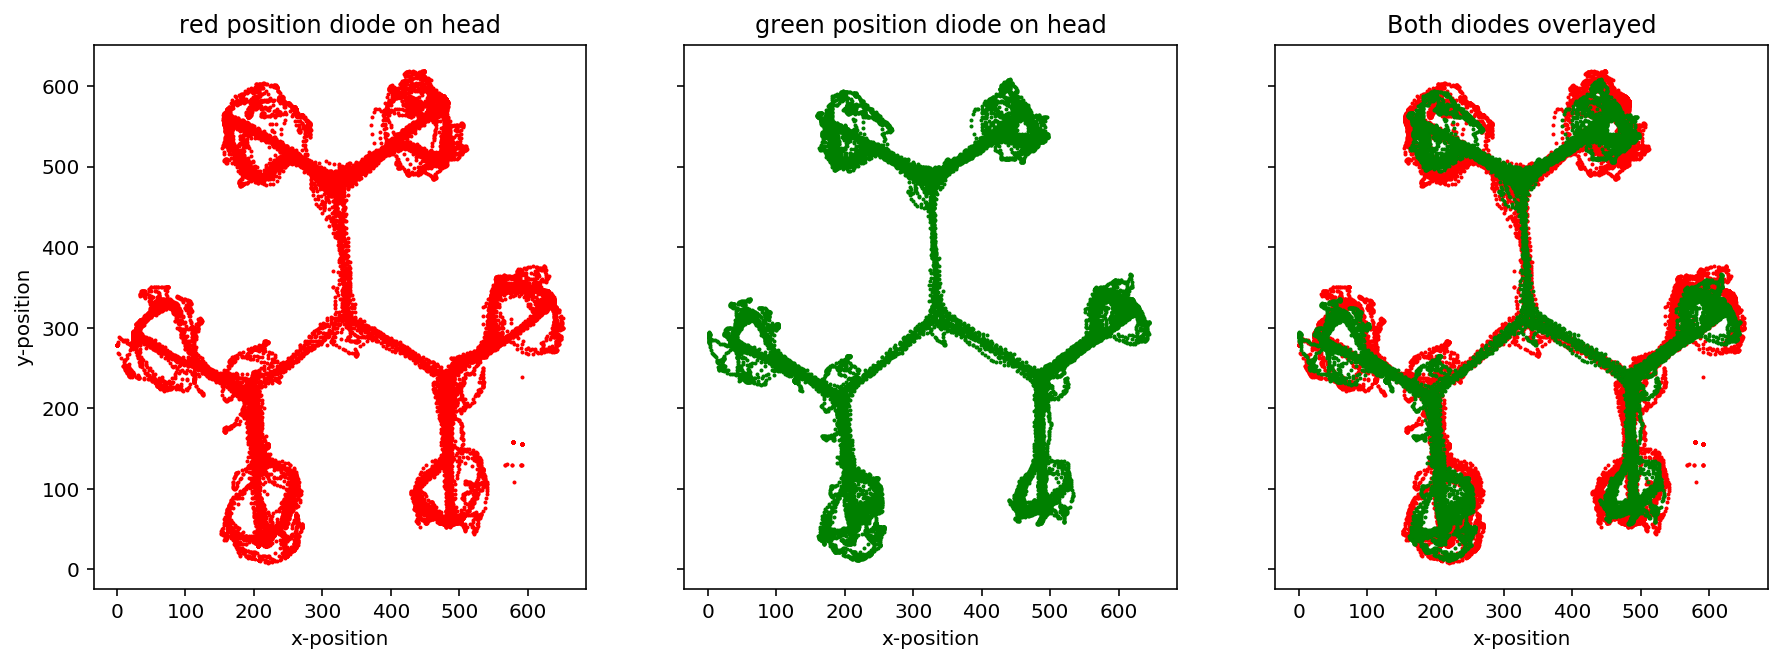

In [7]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
axes[0].scatter(position.xloc, position.yloc, color='red', s=1)
axes[1].scatter(position.xloc2, position.yloc2, color='green', s=1)
axes[2].scatter(position.xloc, position.yloc, color='red', s=1)
axes[2].scatter(position.xloc2, position.yloc2, color='green', s=1)

axes[0].set_xlabel('x-position')
axes[0].set_ylabel('y-position')
axes[0].set_title('red position diode on head')

axes[1].set_xlabel('x-position')
axes[1].set_title('green position diode on head')

axes[2].set_xlabel('x-position')
axes[2].set_title('Both diodes overlayed');

## .DIO folder

TTL pulses

In [8]:
d_in1 = readTrodesExtractedDataFile('../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.DIO/20190902_lotus_06_r3.dio_Din1.dat')
d_in1

{'description': 'State change data for one digital channel. Display_order is 1-based',
 'direction': 'input',
 'id': 'Din1',
 'display_order': '1',
 'byte_order': 'little endian',
 'original_file': '20190902_lotus_06_r3.rec',
 'clockrate': '30000',
 'trodes_version': '1.8.2',
 'compile_date': 'May 16 2019',
 'compile_time': '10:32:19',
 'qt_version': '5.9.8',
 'commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'controller_firmware': '0.0',
 'headstage_firmware': '3.9',
 'autosettle': '0',
 'smartref': '0',
 'gyro': '0',
 'accelerometer': '0',
 'magnetometer': '0',
 'time_offset': '0',
 'system_time_at_creation': '1567459146943',
 'timestamp_at_creation': '390829088',
 'fields': '<time uint32><state uint8>',
 'data': array([(390923532, 0), (393780768, 1), (393783655, 0), (393784231, 1),
        (393786214, 0), (393786441, 1), (393841252, 0), (393841676, 1),
        (393883348, 0), (394279019, 1), (394285931, 0), (394286539, 1),
        (394431203, 0), (394431607, 1), (394435287, 0), (3944

In [9]:
d_in1 = pd.DataFrame(d_in1['data'])
d_in1

,time,state
0,390923532,0
1,393780768,1
2,393783655,0
3,393784231,1
4,393786214,0
...,...,...
298,440559253,0
299,440560023,1
300,440561303,0
301,440561988,1


(395281202, 443083887)

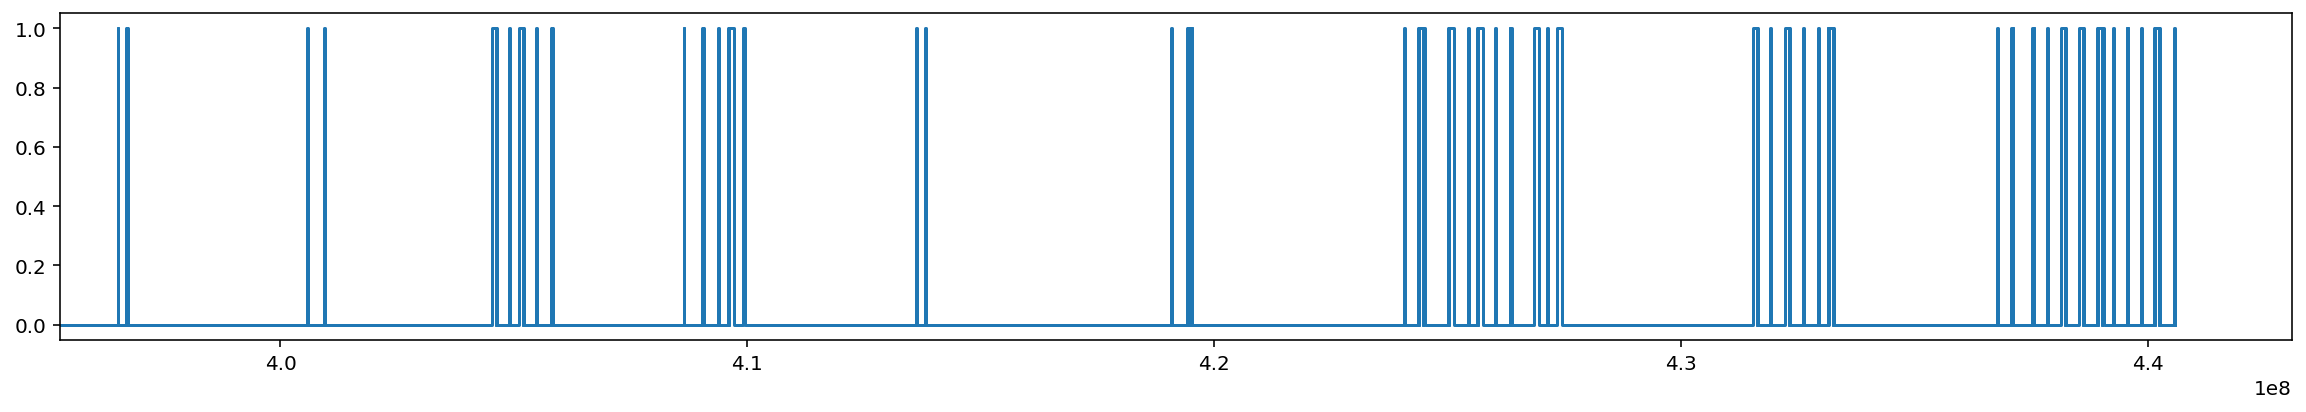

In [10]:
plt.figure(figsize=(20, 3))
plt.step(d_in1.time, d_in1.state, where='post');
plt.xlim((position.time.min(), position.time.max()))

(396400000, 397000000)

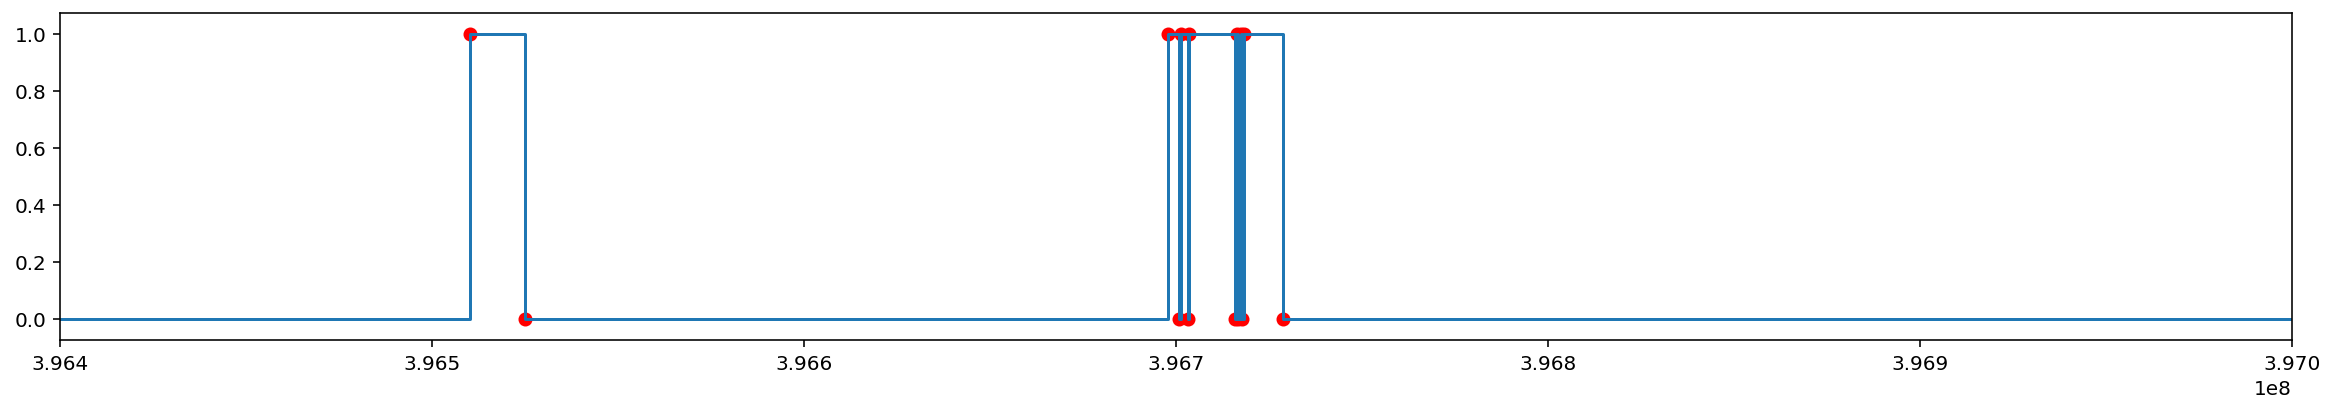

In [11]:
plt.figure(figsize=(20, 3))
plt.step(d_in1.time, d_in1.state, where='post');
plt.scatter(d_in1.time, d_in1.state, color='red')
plt.xlim((396_400_000, 397_000_000))

In [12]:
np.diff(d_in1.time)

array([2857236,    2887,     576,    1983,     227,   54811,     424,
         41672,  395671,    6912,     608,  144664,     404,    3680,
         14277,   10182, 2050347,   14737,  172871,    3112,     509,
          1810,     394,   12187,     735,     153,     952,      85,
           486,   10694, 3840705,    6894,     389,   15756,  332168,
          8425,    1368,   14820,    2050,   10147, 3560452,    4077,
           344,   82169,     362,   34384,  254724,    6983,     472,
         12414,    3637,    4486,  183138,    7758,    1007,   78966,
           266,   17117,  256834,    3648,     628,    1416,     565,
         11809,  314687,    8841,     282,    5234,    1507,    9563,
       2803438,    5790,     522,    1418,     246,   11719,  371340,
          3345,    1365,    1805,     174,   15321,    3904,   13090,
        302805,    7525,    1347,   14253,    4558,    6215,  187394,
         10991,     375,    8571,    2542,  103437,    1305,    3141,
        196029,   24

In [13]:
d_out1 = readTrodesExtractedDataFile('../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.DIO/20190902_lotus_06_r3.dio_Dout1.dat')
d_out1

{'description': 'State change data for one digital channel. Display_order is 1-based',
 'direction': 'output',
 'id': 'Dout1',
 'display_order': '33',
 'byte_order': 'little endian',
 'original_file': '20190902_lotus_06_r3.rec',
 'clockrate': '30000',
 'trodes_version': '1.8.2',
 'compile_date': 'May 16 2019',
 'compile_time': '10:32:19',
 'qt_version': '5.9.8',
 'commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'controller_firmware': '0.0',
 'headstage_firmware': '3.9',
 'autosettle': '0',
 'smartref': '0',
 'gyro': '0',
 'accelerometer': '0',
 'magnetometer': '0',
 'time_offset': '0',
 'system_time_at_creation': '1567459146943',
 'timestamp_at_creation': '390829088',
 'fields': '<time uint32><state uint8>',
 'data': array([(390923532, 0), (442621910, 1), (442629387, 0), (442636888, 1),
        (442644388, 0), (442651888, 1), (442659388, 0), (442666888, 1),
        (442674387, 0), (442681887, 1), (442689388, 0), (442696888, 1),
        (442704387, 0), (442711888, 1), (442719388, 0), (4

In [14]:
d_out1 = pd.DataFrame(d_out1['data'])
d_out1

,time,state
0,390923532,0
1,442621910,1
2,442629387,0
3,442636888,1
4,442644388,0
5,442651888,1
6,442659388,0
7,442666888,1
8,442674387,0
9,442681887,1


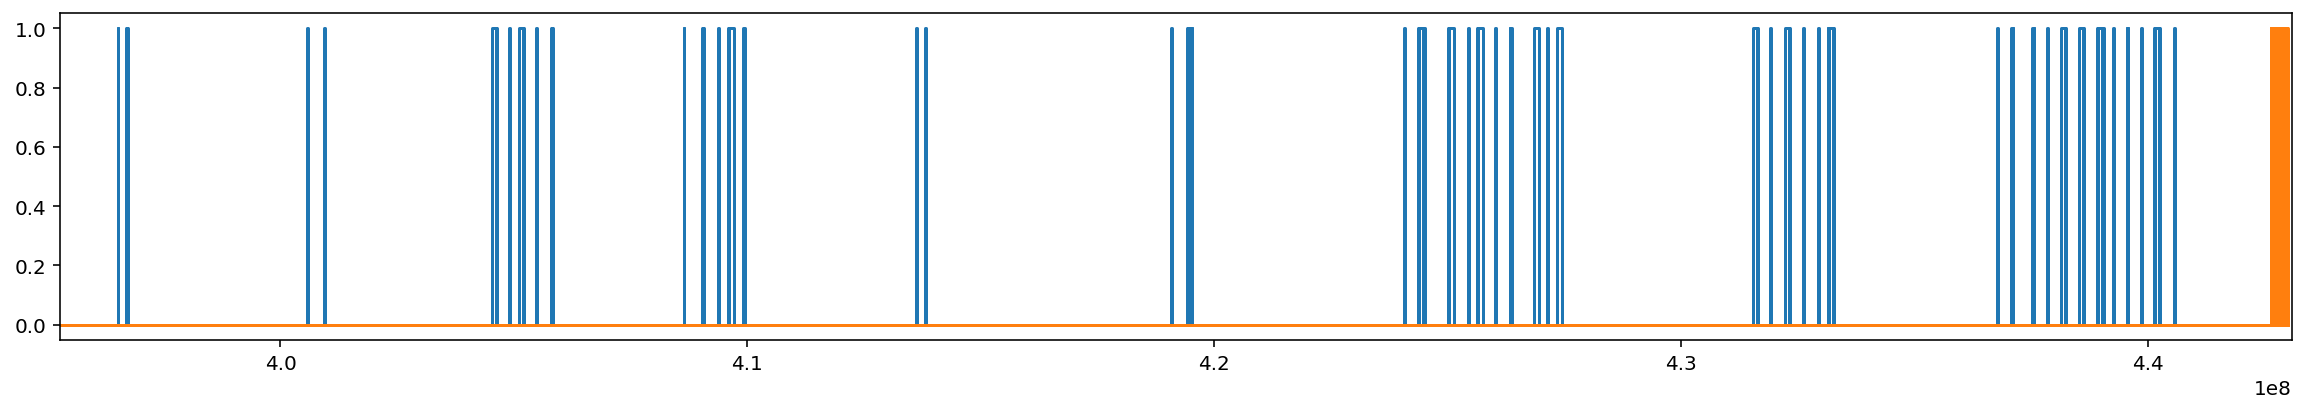

In [15]:
plt.figure(figsize=(20, 3))
plt.step(d_in1.time, d_in1.state, where='post')
plt.step(d_out1.time, d_out1.state, where='post')
plt.xlim((position.time.min(), position.time.max()));

## .mda folder

In [16]:
from mountainlab_pytools.mdaio import readmda

timestamps = readmda('../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.mda/20190902_lotus_06_r3.timestamps.mda')
ntrode = readmda('../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.mda/20190902_lotus_06_r3.nt1.mda')

print(ntrode.shape)
print(timestamps.shape)

(4, 52159456)
(52159456,)


Text(0, 0.5, 'Electrical Potential')

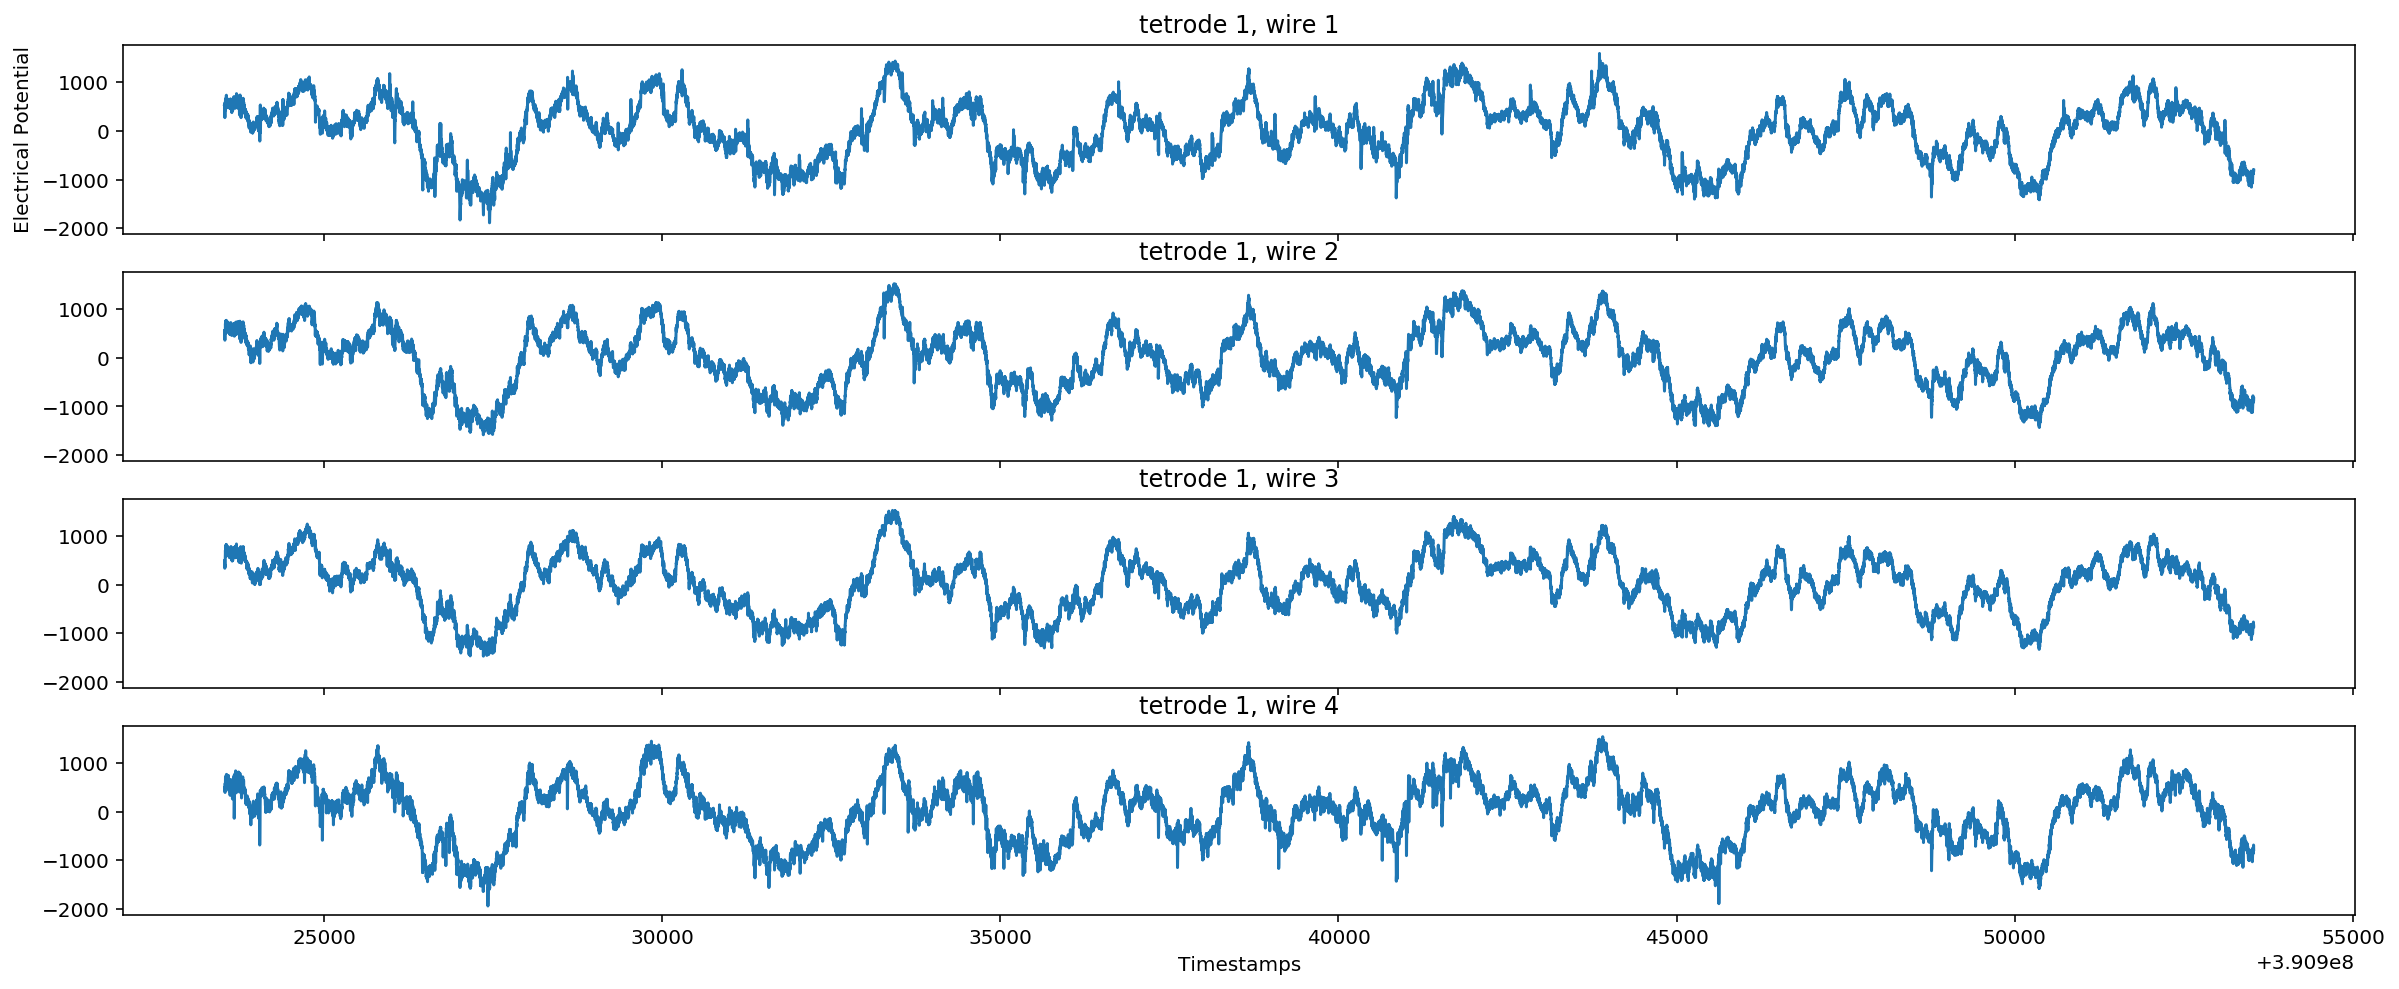

In [17]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(20, 8))

for wire_number, (ax, wire) in enumerate(zip(axes.flat, ntrode)):
    ax.plot(timestamps[:30000], wire[:30000])
    ax.set_title(f'tetrode 1, wire {wire_number+1}')

axes[-1].set_xlabel('Timestamps')
axes[0].set_ylabel('Electrical Potential')

### Reading rec file directly

In [55]:
file_name = '../test_data/lotus/raw/20190902/20190902_lotus_06_r3.rec'
lines = []

with open(file_name, mode='rb') as file: # b is important -> binary
    line = file.readline()
    count = 0
    
    while line:
        print(line)
        count += 1
        line = file.readline()
        lines.append(line.decode())
        if line == b'</Configuration>\n':
            line = file.readline()
            break

lines = ''.join(lines)

b'<?xml version="1.0"?>\n'
b'<Configuration>\n'
b' <GlobalConfiguration realtimeMode="0" qtVersion="5.9.8" timestampAtCreation="390829088" compileDate="May 16 2019" headstageGyroSensorOn="0" controllerFirmwareVersion="0.0" compileTime="10:32:19" controllerSerial="65535 65535" headstageAutoSettleOn="0" systemTimeAtCreation="1567459146943" saveDisplayedChanOnly="1" headstageSerial="00000 00000" headstageFirmwareVersion="3.9" filePath="" headstageAccelSensorOn="0" headstageSmartRefOn="0" commitHead="heads/Release_1.8.2-0-g9a3e37c" trodesVersion="1.8.2" headstageMagSensorOn="0" filePrefix="myAnimal"/>\n'
b' <HardwareConfiguration samplingRate="30000" numChannels="128">\n'
b'  <Device numBytes="1" packetOrderPreference="10" name="MCU_IO" available="1">\n'
b'   <Channel dataType="digital" bit="0" id="MCU_Din1" startByte="0" input="1"/>\n'
b'   <Channel dataType="digital" bit="1" id="MCU_Din2" startByte="0" input="1"/>\n'
b'   <Channel dataType="digital" bit="2" id="MCU_Din3" startByte="0" in

In [56]:
import xml.etree.ElementTree as ET

header = ET.fromstring(lines)
header

<Element 'Configuration' at 0x7f60a07c3e58>

In [43]:
list(header)

[<Element 'GlobalConfiguration' at 0x7f60a1821ef8>,
 <Element 'HardwareConfiguration' at 0x7f60a1821f48>,
 <Element 'ModuleConfiguration' at 0x7f60a07d8c28>,
 <Element 'StreamDisplay' at 0x7f60a07f8278>,
 <Element 'AuxDisplayConfiguration' at 0x7f60a07f82c8>,
 <Element 'SpikeConfiguration' at 0x7f60a0813a48>]

In [70]:
from struct import unpack


print(line)
unpack('I', line[:4])

b"U\xbf\x00\x00\x00\x00\x00\x00\x00\x00%\xdf\x15\xde\xe5\xde\xad\xde\r\xde5\xde\x8d\xde\x15\xde\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00F8&\xd1\xca\xbb\xc0\x15\x0c\x05M\x17\xf1\x00\xea\xff6\xff\xd4\xff\x11\x01M\xffd\x00\xfc\xff\xc6\x00\xde\xffJ\xff\x02\x00l\x01e\x00N\xff\x98\xfe_\x01{\xffd\xff\xf9\xff\xdc\xff\r\xff\xfc\xfe\xf7\xfe|\x01?\xffl\xffu\x00>\x01\t\xff\xb0\xfe\xc4\xfe*\x01n\x01}\x00\r\x00~\xff\xdf\xffc\xff\xd5\xfeM\x01~\x01\xc0\x00p\x00\x8d\xff\xc4\xff\x87\xfe\xf9\xfe\x0c\x02\xd4\x00\xcd\x00\x1e\x01Y\xffj\xff'\xfe\x93\xff\x83\x01D\x01K\x00\xc2\x00\x1e\xffG\x00\xfe\xfd\x81\xff\x13\x01\x17\x01f\x00\xb7\x01\xa8\xff\xf5\xff\x18\xfe\xe8\xfe\xf9\xfe\xf6\xffI\x00L\x01\xbc\xff\xbe\xff\x14\xfe(\xff\xe8\x00\xb3\xff\xdb\x00\xbf\x01\xcb\xffu\xff\xe9\xfe\x19\xff;\xff$\x00>\x00\x9b\x01@\x00}\xffh\xffJ\x00 \xff~\xfdM\x00\xe0\x00\xf3\xfe\x02\x01e\xff\x17\x02L\xff=\x00t\xff!\x012\xff\xf5\x00\x16\x00.\x02\xc1\xff\xc6\xfe\xaa\xff\x89\x00G\xff\xe6\x02C\x00\xec\x01\xbd\xff\x

(48981,)

In [60]:
len(line)

523